In [67]:
from time import strptime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


# Electricity consumption dataset
Electricity in TWh<br> 
Filterd data from 2002 due to missing values<br>

* pds > Public distribution system
* og > Other generators
* aes > All energy suppliers

In [72]:
consumption_data_input = pd.read_csv("../data/monthly_quarterly_electricity_consumption.txt", delimiter="\t", decimal=',')

In [ ]:
consumption_data_input.dtypes

In [78]:
consumption_data = consumption_data_input[consumption_data_input.year >= 2002]

In [79]:
consumption_data['month'] = consumption_data['month'].map(lambda x: strptime(x.replace('*', '').strip(), '%B').tm_mon)
consumption_data['date'] = consumption_data['year'].map(str) + "-" + consumption_data['month'].map(str)

consumption_data.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,year,month,pds_energy_available,pds_transmission_distribution_and_other_losses1,pds_setc_england_and_wales,pds_setc_scotland,pds_setc_northern_ireland,pds_setc_total,pds_setc_industrial,pds_setc_domestic,pds_setc_other,og_electricity_available,og_losses_and_statistical_differences,og_consumption_of_electricity,aes_electricity_available,aes_losses_and_statistical_differences,aes_consumption_of_electricity,date
84,2002,1,31.17,3.89,23.93,2.80,0.54,27.28,7.85,11.23,8.20,2.04,-,2.04,33.21,3.89,29.32,2002-1
85,2002,2,29.78,1.10,25.18,2.89,0.62,28.68,8.83,11.11,8.74,1.94,-,1.94,31.72,1.10,30.62,2002-2
86,2002,3,35.57,2.83,28.72,3.29,0.74,32.75,9.83,12.86,10.06,2.31,-,2.31,37.88,2.83,35.05,2002-3
87,2002,4,26.40,2.24,21.14,2.41,0.60,24.16,7.56,9.01,7.58,2.00,-,2.00,28.40,2.24,26.16,2002-4
88,2002,5,25.56,2.41,20.29,2.26,0.60,23.15,7.70,8.01,7.45,1.90,-,1.90,27.46,2.41,25.05,2002-5


In [80]:
consumption_data['date'] = pd.to_datetime(consumption_data['date'])
consumption_data.set_index('date', inplace = True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5,0,'Year')

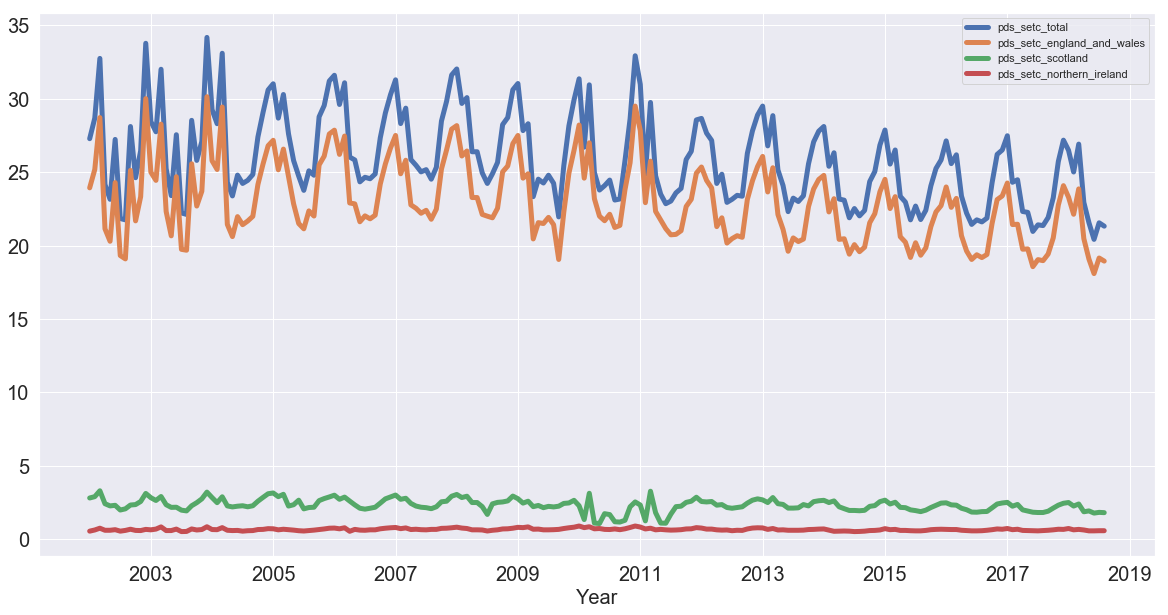

In [83]:
consumption_data[['pds_setc_total', 'pds_setc_england_and_wales', 'pds_setc_scotland', 'pds_setc_northern_ireland']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize = 20)

Text(0.5,0,'Year')

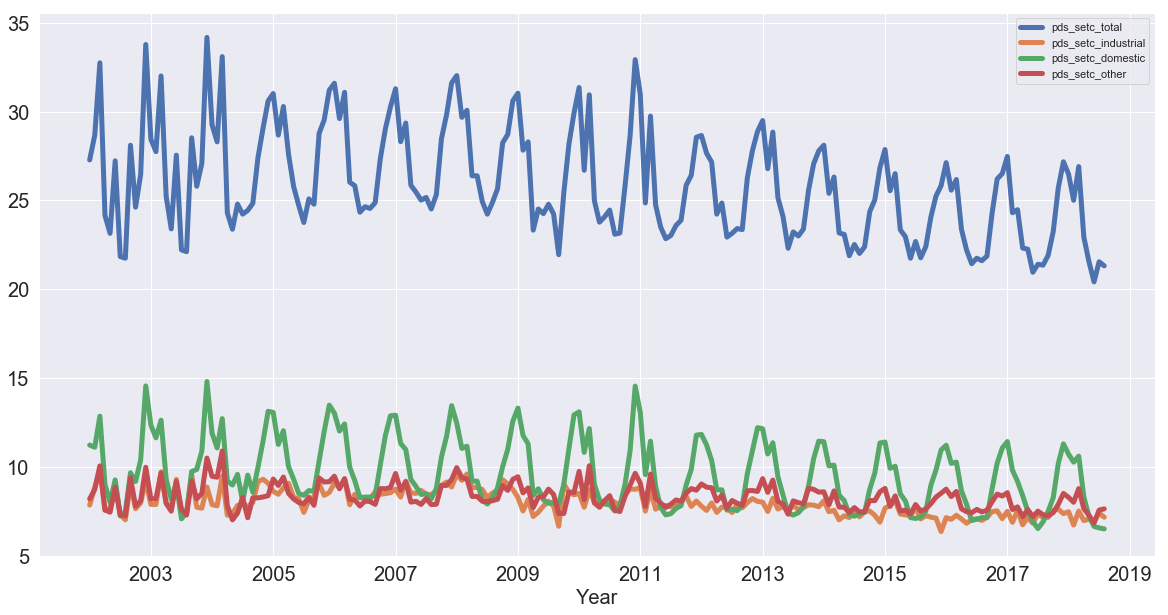

In [82]:
consumption_data[['pds_setc_total', 'pds_setc_industrial', 'pds_setc_domestic', 'pds_setc_other']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize = 20)